In [1]:
import SCRIPro

In [2]:
import scglue
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

/fs/home/xuyunfan/miniconda3/envs/scripro0.6/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rna = sc.read_h5ad("/fs/home/xuyunfan/data/10x/lymph2/rna/rna.h5ad")

In [4]:
rna.var_names_make_unique()

In [5]:
rna

AnnData object with n_obs × n_vars = 14566 × 36621

In [6]:
test_data = SCRIPro.Ori_Data(rna,Cell_num=50)

In [7]:
%%time
test_data.get_positive_marker_gene_parallel(cores=4)

CPU times: user 8.05 s, sys: 8.33 s, total: 16.4 s
Wall time: 23.1 s


In [8]:
rna_seq_data = SCRIPro.SCRIPro_RNA(8,'hg38',test_data,assays=['Direct','DNase','H3K27ac'])

In [10]:
rna_seq_data.cal_ISD_cistrome()

In [11]:
rna_seq_data

In [12]:
rna_seq_data.get_P_value_matrix()

In [13]:
rna_seq_data.get_chip_matrix()

In [14]:
target_h5=pd.HDFStore('/fs/home/xuyunfan/data/ALL_target_3.h5')

In [16]:
%%time
rna_seq_data.get_tf(target_h5)

CPU times: user 4min 42s, sys: 997 ms, total: 4min 43s
Wall time: 4min 47s


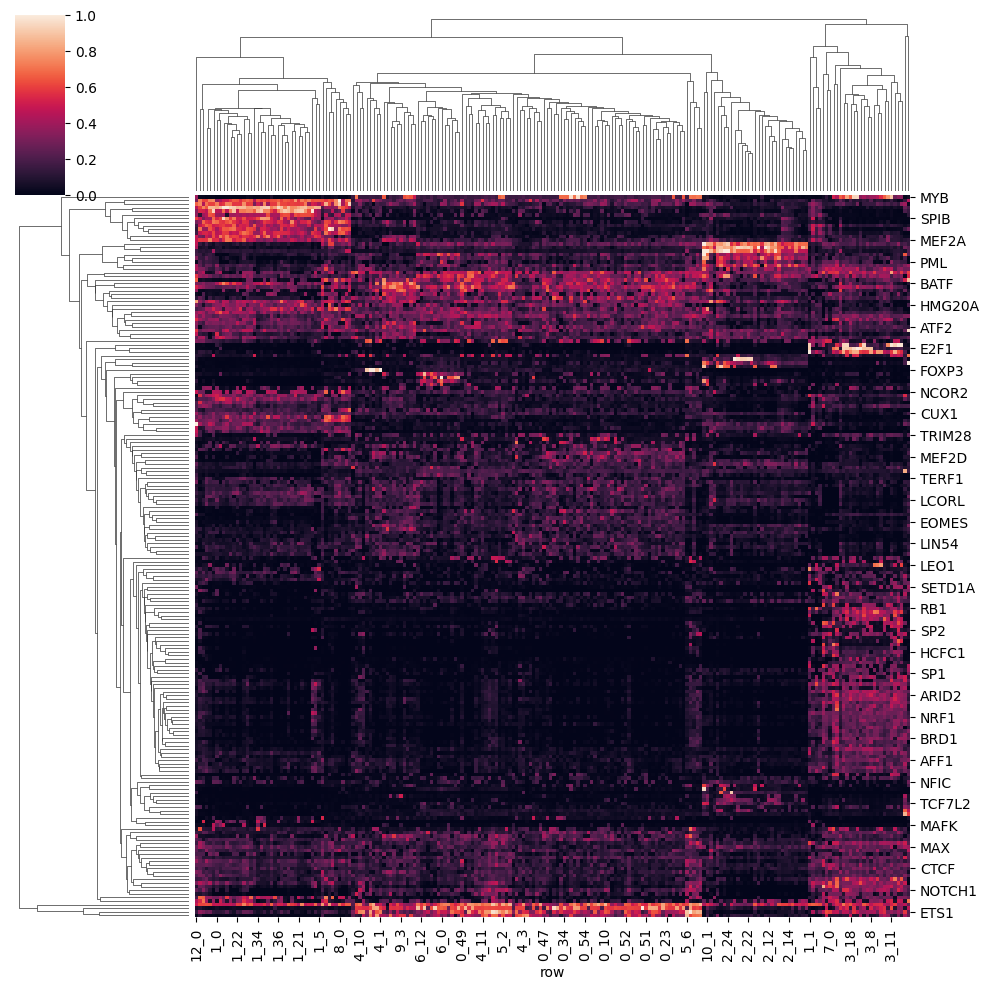

In [24]:
sns.clustermap(rna_seq_data.tf_score.loc[:,rna_seq_data.tf_score.std().sort_values(ascending = False)[0:200].index].T)

In [26]:
rna_seq_data.tf_score

,ADNP,AFF1,AFF4,AGO1,AHR,AIRE,ALX1,ALX3,ALX4,ANHX,...,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN5A,ZSCAN5C,ZXDB,ZXDC
row,,,,,,,,,,,,,,,,,,,,,
0_0,9.037234e-09,0.074891,0.120238,0.001417,0.000478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002442,0.000067,0.0,0.003453,0.000014,0.0,8.998937e-08,0.000001
0_1,6.071832e-06,0.100588,0.164874,0.002326,0.003355,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011894,0.000024,0.0,0.003800,0.000035,0.0,1.302385e-08,0.001393
0_10,1.310368e-03,0.080574,0.043892,0.002972,0.002583,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007658,0.000550,0.0,0.002729,0.000128,0.0,1.066582e-06,0.000103
0_11,2.042401e-06,0.115683,0.252622,0.001660,0.001778,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.014927,0.000106,0.0,0.001362,0.000157,0.0,3.157942e-06,0.004791
0_12,1.066685e-02,0.073948,0.287820,0.000041,0.001354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000596,0.005194,0.0,0.002185,0.000472,0.0,4.090453e-05,0.001623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4,1.151737e-03,0.137951,0.157057,0.010961,0.068571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005741,0.000023,0.0,0.002745,0.001116,0.0,1.879132e-04,0.000000
9_5,1.138956e-02,0.094679,0.035057,0.006459,0.019775,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.019357,0.001402,0.0,0.002071,0.000609,0.0,1.328259e-04,0.037831
9_6,4.745836e-03,0.057741,0.096853,0.003807,0.007857,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.013441,0.000356,0.0,0.005642,0.000482,0.0,1.397533e-04,0.031848


In [40]:
all_cell_score = pd.merge(test_data.adata.obs,rna_seq_data.tf_score,left_on='new_leiden',right_index=True).iloc[:,2:]

In [42]:
all_cell_anndata = sc.AnnData(all_cell_score)

In [46]:
tem_anndata = test_data.adata[all_cell_score.index]

In [48]:
all_cell_anndata.obsm = tem_anndata.obsm

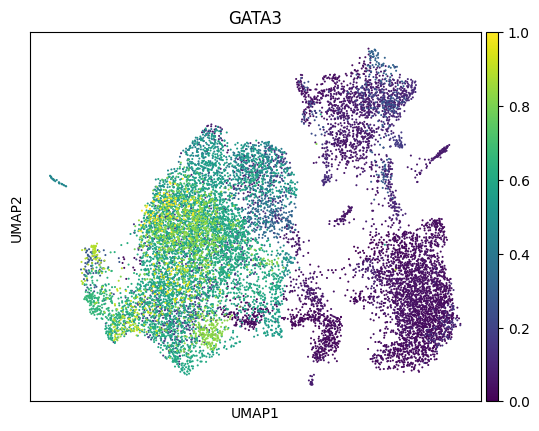

In [53]:
sc.pl.umap(all_cell_anndata,color = 'GATA3')

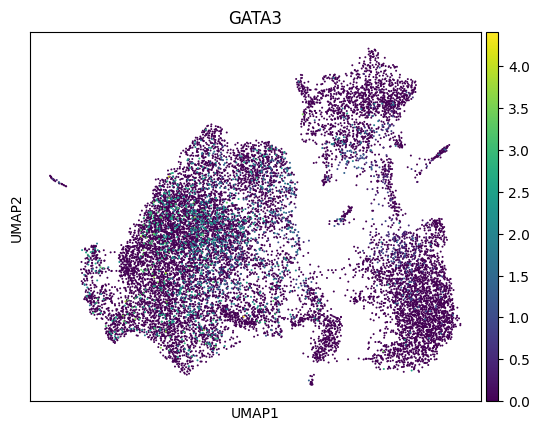

In [52]:
sc.pl.umap(test_data.adata,color = 'GATA3')